## GAMES
##### the basic information file with 47 features about each of 22k board games. Primary key is 

## BGGId 
##### which is the BoardGameGeek game id.

## RATINGS_DISTRIBTION
##### includes full ratings distribution for each BGGId

## THEMES
##### table of themes for each BGGId

## MECHANICS
##### table of mechanics with binary flags per BGGId

## SUBCATEGORIES 
##### table of subcategories with binary flags per BGGId

## ARTISTS_REDUCED 
##### gives artist information for each BGGId. This file is reduced to artists with >3  works, with a binary flag indicating the game included an artist with <= 3 works

## DESIGNERS_REDUCED
##### gives designer information for each BGGId. This file is reduced to designers with >3 works, with a binary flag indicating the game included a designer with <= 3 works

## PUBLISHERS_REDUCED
##### gives publisher information for each BGGId. This file is reduced to publishers with >3 works, with a binary flag indicating the game included a publisher with <= 3 works

## USER_RATINGS
##### has all ratings for all BGGId with username. There are over 411k unique users and ~19 million ratings. Use in recommender system.

In [211]:
#importing relevant libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats
from sklearn.metrics.pairwise import cosine_similarity

In [212]:
#reading in the games dataset
games = pd.read_csv('./data/games.csv')
games['Name']=games['Name']+games['YearPublished'].apply(lambda x: ' (' + str(x) +')')


In [213]:
games.head()

,BGGId,Name,Description,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,...,Rank:partygames,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens
0,1,Die Macher (1986),die macher game seven sequential political rac...,1986,4.3206,7.61428,7.10363,1.57979,3,5,...,21926,21926,0,1,0,0,0,0,0,0
1,2,Dragonmaster (1981),dragonmaster tricktaking card game base old ga...,1981,1.9630,6.64537,5.78447,1.45440,3,4,...,21926,21926,0,1,0,0,0,0,0,0
2,3,Samurai (1998),samurai set medieval japan player compete gain...,1998,2.4859,7.45601,7.23994,1.18227,2,4,...,21926,21926,0,1,0,0,0,0,0,0
3,4,Tal der Könige (1992),triangular box luxurious large block tal der k...,1992,2.6667,6.60006,5.67954,1.23129,2,4,...,21926,21926,0,0,0,0,0,0,0,0
4,5,Acquire (1964),acquire player strategically invest business t...,1964,2.5031,7.33861,7.14189,1.33583,2,6,...,21926,21926,0,1,0,0,0,0,0,0


In [214]:
#creating a dataframe for identifying games later
names = games[['BGGId', 'Name']]
names.to_csv('./data/recommender_data/names.csv')

In [215]:
#separating out the image data so we can use it in our final recommender app
cover_art = games[['BGGId','Name', 'ImagePath']]

In [216]:
#examining the game dataset
games.head()

,BGGId,Name,Description,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,...,Rank:partygames,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens
0,1,Die Macher (1986),die macher game seven sequential political rac...,1986,4.3206,7.61428,7.10363,1.57979,3,5,...,21926,21926,0,1,0,0,0,0,0,0
1,2,Dragonmaster (1981),dragonmaster tricktaking card game base old ga...,1981,1.9630,6.64537,5.78447,1.45440,3,4,...,21926,21926,0,1,0,0,0,0,0,0
2,3,Samurai (1998),samurai set medieval japan player compete gain...,1998,2.4859,7.45601,7.23994,1.18227,2,4,...,21926,21926,0,1,0,0,0,0,0,0
3,4,Tal der Könige (1992),triangular box luxurious large block tal der k...,1992,2.6667,6.60006,5.67954,1.23129,2,4,...,21926,21926,0,0,0,0,0,0,0,0
4,5,Acquire (1964),acquire player strategically invest business t...,1964,2.5031,7.33861,7.14189,1.33583,2,6,...,21926,21926,0,1,0,0,0,0,0,0


In [217]:
#removing unnecessary columns
games = games[[
    'BGGId',
#     'Name',
#     'Description',
    'YearPublished',
    'GameWeight',
    'AvgRating',
    'BayesAvgRating',
#     'StdDev',
    'MinPlayers',
    'MaxPlayers',
#     'ComAgeRec',
#     'LanguageEase',
#     'BestPlayers',
#     'GoodPlayers',
#     'NumOwned',
#     'NumWant',
#     'NumWish',
#     'NumWeightVotes',
    'MfgPlaytime',
#     'ComMinPlaytime',
#     'ComMaxPlaytime',
#     'MfgAgeRec',
    'NumUserRatings',
#     'NumComments',
#     'NumAlternates',
    'NumExpansions',
#     'NumImplementations',
#     'IsReimplementation',
#     'Family',
#     'Kickstarted',
#     'ImagePath',
#     'Rank:boardgame',
#     'Rank:strategygames',
#     'Rank:abstracts',
#     'Rank:familygames',
#     'Rank:thematic',
#     'Rank:cgs',
#     'Rank:wargames',
#     'Rank:partygames',
#     'Rank:childrensgames',
#     'Cat:Thematic',
#     'Cat:Strategy',
#     'Cat:War',
#     'Cat:Family',
#     'Cat:CGS',
#     'Cat:Abstract',
#     'Cat:Party',
#     'Cat:Childrens'
]]

## Game Data Exploration

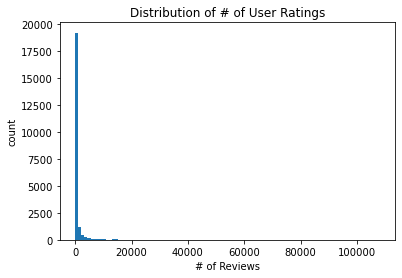

In [218]:
#examining the distribution of user reviews
plt.hist(games['NumUserRatings'], bins=100)
plt.title('Distribution of # of User Ratings')
plt.xlabel('# of Reviews')
plt.ylabel('count')
plt.show()

We see most of our games fall at <1000 reviews, so we will examine that end of the spectrum

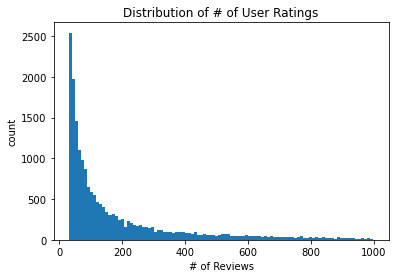

In [219]:
#checking the distribution of number of reviews for games with <1000 reviews

temp = games[games['NumUserRatings']<1000]

plt.hist(temp['NumUserRatings'], bins=100)
plt.title('Distribution of # of User Ratings')
plt.xlabel('# of Reviews')
plt.ylabel('count')
plt.show()

I want to limit my recommendations to the somewhat popular games so that ultimately, my recommender dataframe will be small, and the application will run quickly.

In [220]:
#limiting dataframe to only games that have more that 1,000 reviews

games = games[games['NumUserRatings']>1000]

In [221]:
#checking the shape of the games df
games.shape

(2911, 10)

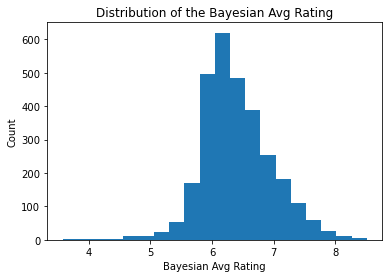

In [222]:
# looking at the distribution of avg rating
plt.hist(games['BayesAvgRating'], bins = 20)
plt.title('Distribution of the Bayesian Avg Rating')
plt.xlabel('Bayesian Avg Rating')
plt.ylabel('Count')
plt.show()

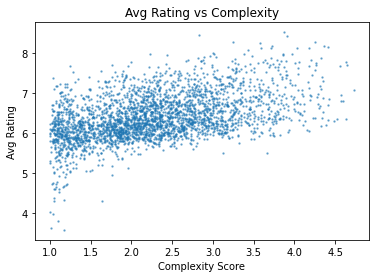

In [223]:
#looking at complexity vs avg rating scatter plot
plt.scatter(games['GameWeight'], games['BayesAvgRating'], s = 2, alpha = 0.5)
plt.title("Avg Rating vs Complexity")
plt.xlabel('Complexity Score')
plt.ylabel('Avg Rating')
plt.show()

Interestingly, it seems like our userbase prefers more complicated games, as there is a linear relationship between the complexity of the game, and the average review score. 

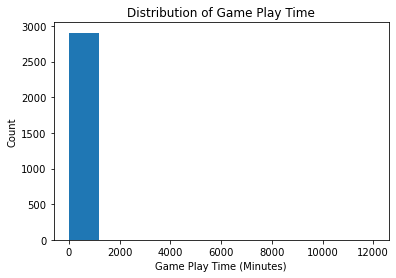

In [224]:
#looking at the distribution of game playtime
plt.hist(games['MfgPlaytime'])
plt.title('Distribution of Game Play Time')
plt.xlabel('Game Play Time (Minutes)')
plt.ylabel('Count')
plt.show()

There are some games with ridiculously long playtimes, and after looking at the data source it turns out that these are not miscoded, but rather obscenely long games. I cannot, in good conscience, recommend a game to someone that would take them 20 hours to play. 

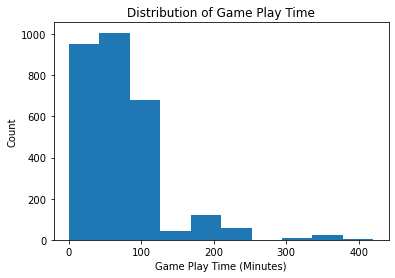

In [225]:
#examining games with a more reasonable play time of <480 minutes
temp = games[games['MfgPlaytime']<480]

plt.hist(temp['MfgPlaytime'])
plt.title('Distribution of Game Play Time')
plt.xlabel('Game Play Time (Minutes)')
plt.ylabel('Count')
plt.show()

In [226]:
games = games[games['MfgPlaytime']<480]

Text(0, 0.5, 'Bayesian Avg. Rating')

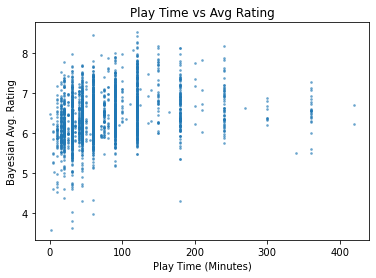

In [227]:
#looking at the relationship between playtime and avg rating

plt.scatter(temp['MfgPlaytime'], temp['BayesAvgRating'], s = 3, alpha = 0.5)
plt.title('Play Time vs Avg Rating')
plt.xlabel('Play Time (Minutes)')
plt.ylabel('Bayesian Avg. Rating')

There appears to be a slightly parabolic relationship between play time and avg score, with the shortest games scoring slightly lower than games with a play time of 1-2 hours, and then a slight fall off in score for games that run longer than 2 hours. 

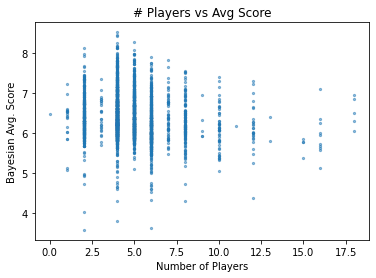

In [228]:
#looking at the relationship between number of players and avg score
#limiting our examination to games with fewer than 20 players
temp = games[games['MaxPlayers']< 20]
plt.scatter(temp['MaxPlayers'], temp['BayesAvgRating'], s = 5, alpha=0.5)
plt.title('# Players vs Avg Score')
plt.xlabel('Number of Players')
plt.ylabel('Bayesian Avg. Score')
plt.show()

Again, we see the parabolic relationship where games for 1-2 players score lower than games for 4 players, and games for more than 4 players also begin to decrease in score. 

Additionally there are handful of games miscoded with max players = 0, so we will fix that.

In [229]:
#For games with max players = 0, replacing max players with the min players value
games['MaxPlayers'] = np.where(games['MaxPlayers'] == 0, games['MinPlayers'], games['MaxPlayers'])

In [230]:
#There are no games missing year published data, but some games have year 
#published listed as 0.

#Removing games with year published = 0
games=games[games['YearPublished']!=0]

In [231]:
#checking min and max of game weight column
print(games['GameWeight'].max(), games['GameWeight'].min())

4.6477 1.0


In [232]:
#checking min and max of playtime column
print(games['MfgPlaytime'].max(), games['MfgPlaytime'].min())

420 0


In [233]:
#grabbing the list of id's for filtering purposes
id_list = list(games['BGGId'])

## Examining the Mechanics Data

In [234]:
#reading in the data
mechanics = pd.read_csv('./data/mechanics.csv')

In [235]:
#examining the data
mechanics.head()

,BGGId,Alliances,Area Majority / Influence,Auction/Bidding,Dice Rolling,Hand Management,Simultaneous Action Selection,Trick-taking,Hexagon Grid,Once-Per-Game Abilities,...,Contracts,Passed Action Token,King of the Hill,Action Retrieval,Force Commitment,Rondel,Automatic Resource Growth,Legacy Game,Dexterity,Physical
0,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,1,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,4,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [236]:
#limiting mechanics df to only games in our games dataframe
mechanics = mechanics.loc[(mechanics['BGGId'].isin(id_list)==True)]

In [237]:
#setting BGGId as the index
games=games.set_index('BGGId')

In [238]:
#merging the mechanics data onto the games data
games = games.join(mechanics, on='BGGId', how='left')

In [239]:
#writing the games data to csv so that it can be used for a product based recommender
games.to_csv('./data/recommender_data/product_data.csv')

# Ratings

In [240]:
#reading in the data
ratings = pd.read_csv('./data/user_ratings.csv')

In [241]:
# limiting the ratings data to only games that meet our criteria
ratings = ratings.loc[(ratings['BGGId'].isin(id_list)==True)]

In [242]:
ratings.columns

Index(['BGGId', 'Rating', 'Username'], dtype='object')

In [243]:
# now we will limit our review data to only users that have reviewed 10
# or more games

#creating a dataframe that shows the number of ratings for each user
total_ratings = pd.DataFrame(ratings.groupby('Username')['Rating'].count()).reset_index()

#currently we have 396,765 users

#getting a list of users with more than 30 games reviewed
total_ratings = total_ratings[total_ratings['Rating']>=100]
prolific_users = list(total_ratings['Username'])

print(len(prolific_users))

#using our list of prolific reviewers to filter our review dataset
ratings = ratings.loc[(ratings['Username'].isin(prolific_users)==True)]

39851


In [244]:
#setting username as the index
ratings = ratings.set_index('Username')

In [245]:
ratings = ratings.reset_index()

In [246]:
ratings = ratings.set_index('BGGId')

In [247]:
# ratings.T

In [248]:
ratings

,Username,Rating
BGGId,,
30549,robvw,4.0
30549,bigcrab,4.0
30549,ubuntu_tyler,4.0
30549,Kbj032,4.0
30549,Dockstreet9,4.0
...,...,...
28086,grandslam,7.0
28086,montsegur,7.0
28086,operamang,7.0


In [249]:
ratings = ratings.reset_index()

In [250]:
ratings.shape

(8721893, 3)

In [251]:
games.shape

(2893, 167)

In [252]:
ratings = ratings.pivot_table(index='BGGId', columns='Username', values='Rating')

In [253]:
ratings.shape

(2893, 39851)

In [254]:
ratings.to_csv('./data/recommender_data/rating_data.csv')

In [255]:
#limiting the image path data to only the board games we care about
cover_art = cover_art.loc[(cover_art['BGGId'].isin(id_list)==True)]

In [256]:
cover_art.to_csv('./data/cover_art.csv')

In [257]:
games.to_csv('./data/recommender_data/product_data.csv')